# Title

In [2]:
!pip list | grep "fastai"

fastai                        2.7.9


In [15]:
!pip install nbdev -q

In [16]:
from fastai.vision.all import *
import nbdev

In [3]:
# download and untar PASCAL 2007 dataset
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#10) [Path('/home/stormbird/.fastai/data/pascal_2007/train'),Path('/home/stormbird/.fastai/data/pascal_2007/model.pkl'),Path('/home/stormbird/.fastai/data/pascal_2007/train.json'),Path('/home/stormbird/.fastai/data/pascal_2007/models'),Path('/home/stormbird/.fastai/data/pascal_2007/test'),Path('/home/stormbird/.fastai/data/pascal_2007/train.csv'),Path('/home/stormbird/.fastai/data/pascal_2007/test.json'),Path('/home/stormbird/.fastai/data/pascal_2007/valid.json'),Path('/home/stormbird/.fastai/data/pascal_2007/segmentation'),Path('/home/stormbird/.fastai/data/pascal_2007/test.csv')]

In [4]:
!ls

app1.ipynb	      multiclass-model.zip	       requirements.txt
Makefile	      multilabel-classification.ipynb  setup-conda.sh
multiclass-model.pkl  README.md			       todo.md


In [5]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [6]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

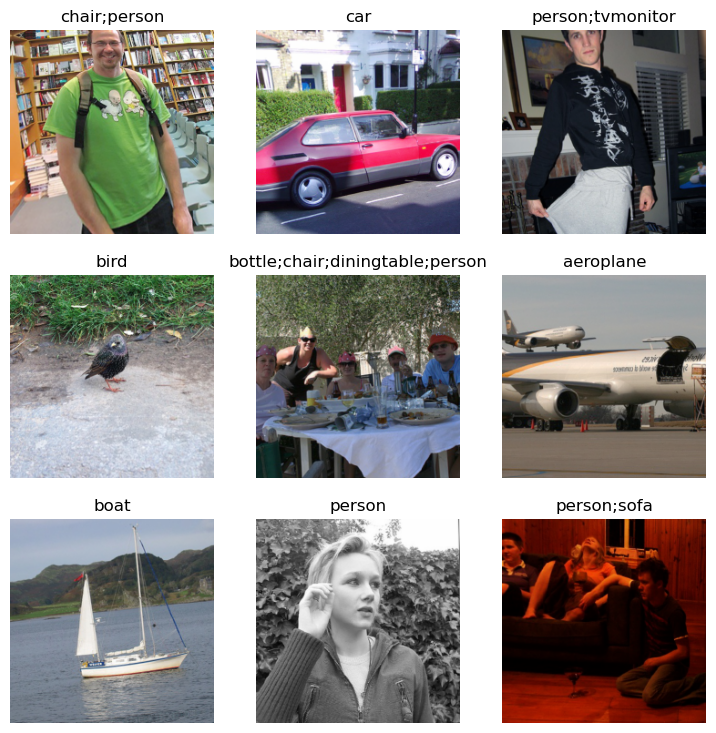

In [7]:
dls.show_batch()

In [14]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples], batch_size=8)

TypeError: create_vision_model() got an unexpected keyword argument 'batch_size'

SuggestedLRs(valley=0.0014454397605732083)

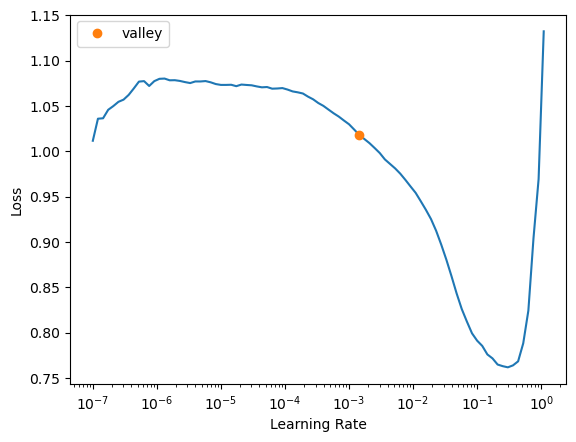

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(2, 3e-2, moms = (0.85,0.95))

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.438753,0.120588,0.961116,0.720171,0.756334,00:20


epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time


RuntimeError: Unable to find a valid cuDNN algorithm to run convolution

In [4]:
learn.show_results()

NameError: name 'learn' is not defined

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [5]:
torch.cuda.is_available()

True

Trained on a GPU 

In [ ]:
learn.export("/home/stormbird/Desktop/fast-ai-projects/week2-deploy-test/model.pkl")

In [ ]:
!ls

In [3]:
learner = load_learner("/home/stormbird/Desktop/fast-ai-projects/week2-deploy-test/multiclass-model.pkl")

In [6]:
learner.dls.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [10]:
# see what the labels are
labels = learner.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learner.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [12]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)

/home/stormbird/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/stormbird/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/stormbird/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/stormbird/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://25878.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f01c4f38760>,
 'http://127.0.0.1:7861/',
 'https://25878.gradio.app')

In [ ]:
# look at other capturing options and exporting the report.